<a href="https://colab.research.google.com/github/FoxFortino/DSPS_WFortino/blob/main/HW10/HW10_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import h5py
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
import keras.optimizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# import scipy as sp
# import scipy.stats
# import scipy.optimize
# import scipy.spatial
# import scipy.cluster

# import astropy as ap
# import astropy.time
# import astropy.units as u
# import astropy.constants as c

# import emcee
# import corner

import sklearn
from sklearn.model_selection import train_test_split as tts
# import sklearn.preprocessing
# import sklearn.manifold
# import sklearn.cluster
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.datasets import make_classification
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import RandomizedSearchCV

# from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
# from sklearn.metrics import confusion_matrix

# For running on Colaboratory
# ! pip install corner
# ! pip install emcee

# custom_mplstyle = ("https://raw.githubusercontent.com/FoxFortino"
#                    "/DSPS_WFortino/main/custom.mplstyle")
# plt.style.use(custom_mplstyle)

rng = np.random.RandomState(193)

In [ ]:
def plot_mnist(img, default_shape=(28, 28)):

    if img.shape != default_shape:
        img = img.reshape(default_shape)

    plt.imshow(img, cmap=plt.cm.Greys)
    plt.axis("off")
    plt.show()


def plot_model_loss(fit, log=False):
    plt.figure(figsize=(12, 6))
    plt.plot(np.array(fit.history['loss']), label="Training")
    plt.plot(np.array(fit.history['val_loss']), label="Validation")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    if log:
        plt.yscale('log')
        plt.xscale('log')
    plt.show()


def compareinout(i, outim, testimg, initialshape=(28,28)):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121) 
    ax.imshow(testimg[i].reshape(initialshape), cmap="bone")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = fig.add_subplot(122) 
    ax.imshow(outim[i].reshape(initialshape), cmap="bone")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()


def visualize_prediction(N, tst, prd):
    for i in range(N):
        compareinout(i, prd, tst)

# Preprocessing Data

11501568/11490434 [==============================] - 0s 0us/step


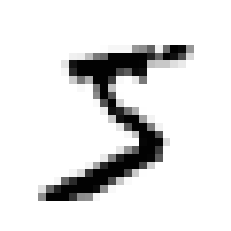

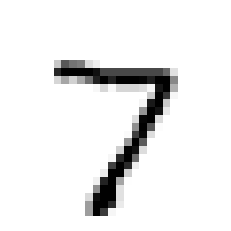

In [3]:
# Load data
(Xtrn, Ytrn), (Xtst, Ytst) = mnist.load_data()

# Extract metadata
imgShape = Xtrn[0].shape
nRow, nCol = imgShape
nDim = nRow * nCol
nTrn = Xtrn.shape[0]
nTst = Xtst.shape[0]

# Normalize data from a scale of [0, 255] (integers) to a scale of [0, 1]
Xtrn = Xtrn.astype(float) / 255
Xtst = Xtst.astype(float) / 255

# Reshape data from (nRow, nCol) to (nRow * nCol,). We are not making a CNN, we
# are just inputting a one dimensional vector represnting the image into the NN.
Xtrn = Xtrn.reshape(nTrn, nDim)
Xtst = Xtst.reshape(nTst, nDim)

# One-hot encode the labels
# Ytrn = keras.utils.all_utils.to_categorical(Ytrn, num_classes=10, dtype=int)
# Ytst = keras.utils.all_utils.to_categorical(Ytst, num_classes=10, dtype=int)

# Ytrn = Ytrn.astype(float)
# Ytst = Ytst.astype(float)

# Visualize one of the images
plot_mnist(Xtrn[0])
plot_mnist(Xtst[0])

# Digit Recognition

In [4]:
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=nDim))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="sigmoid"))

callback = EarlyStopping(monitor='val_loss',
                         patience=5,
                         min_delta=0.001)
opt = keras.optimizers.adam_v2.Adam(learning_rate=0.00001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt)

fit = model.fit(Xtrn, Ytrn,
                validation_data=(Xtst, Ytst),
                batch_size=100, epochs=100,
                verbose=1, callbacks=[callback])

Epoch 1/100
600/600 [==============================] - 4s 3ms/step - loss: 2.1034 - val_loss: 1.8224
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 1.5410 - val_loss: 1.2416
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 1.0652 - val_loss: 0.8695
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.7874 - val_loss: 0.6728
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.6348 - val_loss: 0.5594
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.5417 - val_loss: 0.4873
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4799 - val_loss: 0.4380
Epoch 8/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4361 - val_loss: 0.4021
Epoch 9/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4034 - val_loss: 0.3749
Epoch 10/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3782 - val_lo

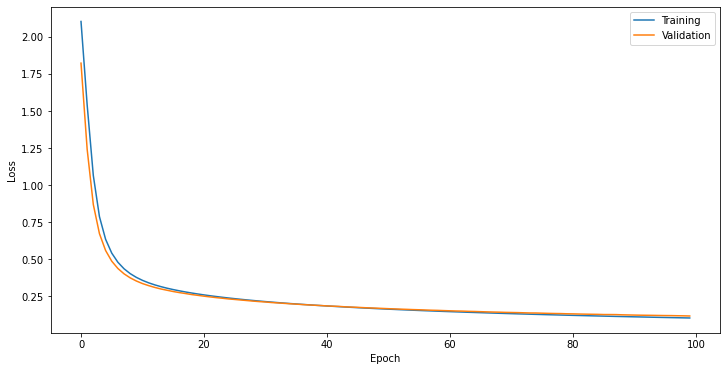

In [5]:
plot_model_loss(fit)

### Figure 1: The training and validation set sparse categorical cross entropy losses are plotted for this digit recogniztion model with the MNIST dataset. With a learning rate of 1e-5 and 100 epochs, there are signs of overfitting as the validation loss is improving more slowly than the training loss.

In [6]:
pred = model.predict(Xtst)
pred = np.argmax(pred, axis=1)
accuracy = np.sum(Ytst == pred) / nTst
accuracy

0.9642

### The accuracy of the model after 100 epochs is 96.42%

---

<h1 style="color:red"> Great !</h1>
